In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import sklearn
import random
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error

In [79]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error

In [80]:
filename = 'Dataset/Sensor_Discrimination_normalized.csv'
df=pd.read_csv(filename)
# shuffle the DataFrame rows
df = df.sample(frac = 1) #frac = fraction
dataset=df.iloc[:,:-1]
label=df.iloc[:,-1]
print(dataset)
print(label)

            F2        F3        F1       F11        F4        F6       F10  \
1342  0.523636  0.468035  0.274045  0.239894  0.369865  0.050000  0.268449   
1536  0.467166  0.618102  0.400784  0.211525  0.533178  0.081886  0.277861   
1296  0.807914  0.878701  0.756121  0.190957  0.836355  0.330126  0.329443   
1636  0.412834  0.591016  0.350245  0.203191  0.488774 -0.008725  0.270331   
1237  0.928556  0.975437  0.836043  0.243972  0.939464  0.457944  0.593750   
...        ...       ...       ...       ...       ...       ...       ...   
690   0.402139  0.909489  0.608815  0.222872  0.641277  0.175151  0.348456   
1144  0.253262  0.963829  0.921645  0.441135  0.989024  0.658329  0.967056   
285   0.806417  0.502692  0.256611  0.170762  0.394312  0.043293  0.180629   
1418  0.185647  0.947510  0.875612  0.972163  0.982039  0.745190  0.935241   
72    0.249626  0.919919  0.893634  0.976950  0.995343  0.579714  0.953878   

            F9        F5      F7     F12       F8  
1342  0.031

In [81]:
dataset_arr=dataset.to_numpy()
# from NecessaryModules.splitData import split_data
X_train,X_comb, y_train,y_comb = train_test_split(dataset_arr, label, test_size=0.4, random_state=42)
print(len(X_train))

1327


In [82]:
X_valid, X_test, y_valid, y_test = train_test_split(X_comb, y_comb, test_size=0.50, random_state=42)
print(len(X_valid))

442


# Encoder implement

In [83]:
import pickle

# Load the encoder model from the saved file
with open("all_pkl_file/Encoder_3.pkl", "rb") as file: #"rb"= read mode
    encoder = pickle.load(file)

encoder


In [84]:
encoded_X = pd.DataFrame(encoder.predict(dataset))
encoded_X = encoded_X.add_prefix('feature_')

encoded_X_train = pd.DataFrame(encoder.predict(X_train))
encoded_X_train = encoded_X_train.add_prefix('feature_')

encoded_X_valid = pd.DataFrame(encoder.predict(X_valid))
encoded_X_valid = encoded_X_valid.add_prefix('feature_')

encoded_X_test = pd.DataFrame(encoder.predict(X_test))
encoded_X_test = encoded_X_test.add_prefix('feature_')



42/42 [==============================] - 0s 954us/step


14/14 [==============================] - 0s 1ms/step


# reshape the data 

In [85]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler(copy=True).fit(dataset)
encoded_X_n=scaler.transform(dataset)
encoded_X_train_n=scaler.transform(X_train)
encoded_X_valid_n=scaler.transform(X_valid)
encoded_X_test_n=scaler.transform(X_test)
encoded_X_train_n

array([[0.22117647, 0.87483176, 0.7294809 , ..., 0.13274734, 0.2567    ,
        0.22193495],
       [0.1148877 , 0.94111709, 0.87972576, ..., 0.41782502, 0.044375  ,
        0.54161802],
       [0.32299465, 0.88744953, 0.86033301, ..., 0.4840556 , 0.28845   ,
        0.46830692],
       ...,
       [0.91465241, 0.91487214, 0.90989226, ..., 0.30690924, 0.033265  ,
        0.4000834 ],
       [0.61754011, 0.85397039, 0.77375122, ..., 0.22857727, 0.03961   ,
        0.27689741],
       [0.13655615, 0.86036339, 0.83055828, ..., 0.19762878, 0.03589   ,
        0.11301084]])

In [86]:
encoded_X_valid_n.shape

(442, 12)

In [87]:
X_train_arr=encoded_X_train_n.reshape(encoded_X_train_n.shape[0],encoded_X_train_n.shape[1],1)
X_train_arr.shape

(1327, 12, 1)

In [88]:
# X_valid_arr=compressed_dataset_X_valid.to_numpy()
X_valid_arr=encoded_X_valid_n.reshape(encoded_X_valid_n.shape[0],encoded_X_valid_n.shape[1],1)
X_valid_arr.shape

(442, 12, 1)

In [89]:
X_test_arr=encoded_X_test_n.reshape(encoded_X_test_n.shape[0],encoded_X_test_n.shape[1],1)
X_test_arr.shape

(443, 12, 1)

In [90]:
# for "y"

y_train_arr=np.array(y_train)
y_train_arr=y_train_arr.reshape(y_train_arr.shape[0],1)

y_valid_arr=np.array(y_valid)
y_valid_arr=y_valid_arr.reshape(y_valid_arr.shape[0],1)

y_test_arr=np.array(y_test)
y_test_arr=y_test_arr.reshape(y_test_arr.shape[0],1)

In [91]:
y_test_arr.shape

(443, 1)

# one hot encode

In [92]:
from keras.utils import to_categorical
# one hot encoding
y_train_arr = to_categorical(y_train, 3)
y_valid_arr = to_categorical(y_valid, 3)
y_test_arr = to_categorical(y_test, 3)

In [93]:
y_test_arr

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

# model

In [94]:

# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import MaxPooling1D


In [95]:
import tensorflow as tf
callback=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=4,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [96]:
# Global value
verbose, epochs, batch_size = 1, 100, 40


In [97]:
# fit and evaluate a model
import optuna
from matplotlib import pyplot as plt

def optimize_model(trainX, trainy,validX,validy):
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], 3
    def objective_model1(trial):
    # Define hyperparameters to be tuned
     
     filters = trial.suggest_int('filters', 32, 128)
    #  kernel_size = trial.suggest_int('kernel_size', 2, 5)
     dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
     dense_units = trial.suggest_int('dense_units', 50, 200)
     
     # Build the CNN model
     model = Sequential()
     model.add(Conv1D(filters=filters, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
     model.add(Conv1D(filters=filters, kernel_size=2, activation='relu'))
     model.add(Dropout(dropout_rate))
    #  model.add(MaxPooling1D(pool_size=2))
     model.add(Flatten())
     model.add(Dense(dense_units, activation='relu'))
     model.add(Dense(n_outputs, activation='softmax'))
 
     # Compile the model
     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 
     # Fit the model
     history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=epochs,callbacks=[callback],batch_size=batch_size, verbose=verbose)
    
    # Return the validation accuracy as the objective value
     return history.history['val_accuracy'][-1]
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_model1, n_trials= 10, 
                   #timeout=600
                   )#The maximum time (in seconds) allowed for the optimization process to run.
    # Get the best hyperparameters
    best_params = study.best_params
    print("Best Hyperparameters:", best_params)


    return best_params
 



In [98]:
# summarize scores
def summarize_results(scores):
 print(scores)
 m, s = mean(scores), std(scores)
 print('Test Accuracy: %.3f%% (+/-%.3f)' % (m, s))
 

# Calculate the accuracy

In [99]:

best_params=optimize_model(X_train_arr, y_train_arr, X_valid_arr, y_valid_arr)

[I 2024-02-12 15:40:22,545] A new study created in memory with name: no-name-4e695737-5847-47c4-b34b-a5f371420cad


Epoch 1/100
34/34 [==============================] - 1s 11ms/step - loss: 0.7983 - accuracy: 0.7084 - val_loss: 0.3868 - val_accuracy: 0.8688
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 0.2996 - accuracy: 0.8855 - val_loss: 0.2167 - val_accuracy: 0.9208
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 0.2052 - accuracy: 0.9254 - val_loss: 0.1783 - val_accuracy: 0.9412
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1584 - accuracy: 0.9457 - val_loss: 0.1402 - val_accuracy: 0.9751
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1439 - accuracy: 0.9472 - val_loss: 0.1273 - val_accuracy: 0.9729
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1086 - accuracy: 0.9638 - val_loss: 0.1074 - val_accuracy: 0.9796
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1019 - accuracy: 0.9668 - val_loss: 0.1242 - val_accuracy: 0.9683
Epoch 8/100


[I 2024-02-12 15:40:31,493] Trial 0 finished with value: 0.9841628670692444 and parameters: {'filters': 103, 'dropout_rate': 0.18674099182264345, 'dense_units': 114}. Best is trial 0 with value: 0.9841628670692444.


Epoch 1/100
34/34 [==============================] - 1s 12ms/step - loss: 0.7985 - accuracy: 0.6940 - val_loss: 0.3767 - val_accuracy: 0.8778
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 0.3168 - accuracy: 0.8779 - val_loss: 0.2442 - val_accuracy: 0.9050
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 0.2173 - accuracy: 0.9239 - val_loss: 0.1704 - val_accuracy: 0.9570
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1624 - accuracy: 0.9420 - val_loss: 0.1768 - val_accuracy: 0.9299
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1418 - accuracy: 0.9503 - val_loss: 0.1274 - val_accuracy: 0.9729
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1217 - accuracy: 0.9601 - val_loss: 0.1330 - val_accuracy: 0.9683
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 0.0976 - accuracy: 0.9668 - val_loss: 0.1045 - val_accuracy: 0.9796
Epoch 8/100


[I 2024-02-12 15:40:39,249] Trial 1 finished with value: 0.9864253401756287 and parameters: {'filters': 93, 'dropout_rate': 0.3512491720502938, 'dense_units': 200}. Best is trial 1 with value: 0.9864253401756287.


Epoch 1/100
34/34 [==============================] - 1s 9ms/step - loss: 0.8697 - accuracy: 0.7249 - val_loss: 0.5352 - val_accuracy: 0.8620
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 0.3434 - accuracy: 0.8772 - val_loss: 0.2569 - val_accuracy: 0.8959
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 0.2506 - accuracy: 0.9058 - val_loss: 0.1977 - val_accuracy: 0.9457
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 0.2008 - accuracy: 0.9299 - val_loss: 0.1618 - val_accuracy: 0.9593
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1537 - accuracy: 0.9548 - val_loss: 0.1360 - val_accuracy: 0.9774
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1477 - accuracy: 0.9540 - val_loss: 0.1148 - val_accuracy: 0.9774
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1140 - accuracy: 0.9661 - val_loss: 0.1209 - val_accuracy: 0.9683
Epoch 8/100
3

[I 2024-02-12 15:40:45,116] Trial 2 finished with value: 0.9886877536773682 and parameters: {'filters': 54, 'dropout_rate': 0.13801574125033134, 'dense_units': 151}. Best is trial 2 with value: 0.9886877536773682.


Epoch 1/100
34/34 [==============================] - 1s 11ms/step - loss: 0.8446 - accuracy: 0.6722 - val_loss: 0.4784 - val_accuracy: 0.8575
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 0.3480 - accuracy: 0.8644 - val_loss: 0.2526 - val_accuracy: 0.8665
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 0.2291 - accuracy: 0.9028 - val_loss: 0.2025 - val_accuracy: 0.9276
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1908 - accuracy: 0.9284 - val_loss: 0.1547 - val_accuracy: 0.9570
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1408 - accuracy: 0.9518 - val_loss: 0.1332 - val_accuracy: 0.9729
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1256 - accuracy: 0.9593 - val_loss: 0.1279 - val_accuracy: 0.9683
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1047 - accuracy: 0.9668 - val_loss: 0.0971 - val_accuracy: 0.9796
Epoch 8/100


[I 2024-02-12 15:40:51,567] Trial 3 finished with value: 0.9819004535675049 and parameters: {'filters': 126, 'dropout_rate': 0.25947440517382103, 'dense_units': 88}. Best is trial 2 with value: 0.9886877536773682.


Epoch 1/100
34/34 [==============================] - 1s 9ms/step - loss: 0.8481 - accuracy: 0.7370 - val_loss: 0.4756 - val_accuracy: 0.8371
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 0.3546 - accuracy: 0.8666 - val_loss: 0.2527 - val_accuracy: 0.8620
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 0.2519 - accuracy: 0.9088 - val_loss: 0.1993 - val_accuracy: 0.9389
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1905 - accuracy: 0.9231 - val_loss: 0.1630 - val_accuracy: 0.9615
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1533 - accuracy: 0.9427 - val_loss: 0.1569 - val_accuracy: 0.9638
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1508 - accuracy: 0.9450 - val_loss: 0.1355 - val_accuracy: 0.9548
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1220 - accuracy: 0.9601 - val_loss: 0.1284 - val_accuracy: 0.9615
Epoch 8/100
3

[I 2024-02-12 15:41:01,782] Trial 4 finished with value: 0.9864253401756287 and parameters: {'filters': 60, 'dropout_rate': 0.2926563782099887, 'dense_units': 178}. Best is trial 2 with value: 0.9886877536773682.


Epoch 1/100
34/34 [==============================] - 1s 10ms/step - loss: 0.9040 - accuracy: 0.6390 - val_loss: 0.5715 - val_accuracy: 0.8552
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 0.4076 - accuracy: 0.8523 - val_loss: 0.3048 - val_accuracy: 0.8778
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 0.2706 - accuracy: 0.8922 - val_loss: 0.2217 - val_accuracy: 0.9344
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 0.2140 - accuracy: 0.9118 - val_loss: 0.1889 - val_accuracy: 0.9389
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1790 - accuracy: 0.9299 - val_loss: 0.1588 - val_accuracy: 0.9548
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1454 - accuracy: 0.9510 - val_loss: 0.1326 - val_accuracy: 0.9729
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1463 - accuracy: 0.9472 - val_loss: 0.1100 - val_accuracy: 0.9774
Epoch 8/100


[I 2024-02-12 15:41:11,517] Trial 5 finished with value: 0.9864253401756287 and parameters: {'filters': 62, 'dropout_rate': 0.2968241949584094, 'dense_units': 129}. Best is trial 2 with value: 0.9886877536773682.


Epoch 1/100
34/34 [==============================] - 1s 10ms/step - loss: 0.8295 - accuracy: 0.7302 - val_loss: 0.4717 - val_accuracy: 0.8462
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 0.3577 - accuracy: 0.8659 - val_loss: 0.2655 - val_accuracy: 0.8824
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 0.2486 - accuracy: 0.9103 - val_loss: 0.1922 - val_accuracy: 0.9344
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1835 - accuracy: 0.9352 - val_loss: 0.1496 - val_accuracy: 0.9774
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1597 - accuracy: 0.9390 - val_loss: 0.1282 - val_accuracy: 0.9774
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1304 - accuracy: 0.9548 - val_loss: 0.1232 - val_accuracy: 0.9751
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0973 - accuracy: 0.9661 - val_loss: 0.0973 - val_accuracy: 0.9819
Epoch 8/100


[I 2024-02-12 15:41:18,717] Trial 6 finished with value: 0.9819004535675049 and parameters: {'filters': 89, 'dropout_rate': 0.24362333141957893, 'dense_units': 112}. Best is trial 2 with value: 0.9886877536773682.


Epoch 1/100
34/34 [==============================] - 1s 10ms/step - loss: 0.8270 - accuracy: 0.6865 - val_loss: 0.3973 - val_accuracy: 0.8507
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 0.3123 - accuracy: 0.8794 - val_loss: 0.3445 - val_accuracy: 0.8439
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 0.2519 - accuracy: 0.8907 - val_loss: 0.1844 - val_accuracy: 0.9502
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1868 - accuracy: 0.9254 - val_loss: 0.1598 - val_accuracy: 0.9593
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1727 - accuracy: 0.9269 - val_loss: 0.1563 - val_accuracy: 0.9434
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1289 - accuracy: 0.9563 - val_loss: 0.1272 - val_accuracy: 0.9661
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1115 - accuracy: 0.9601 - val_loss: 0.1083 - val_accuracy: 0.9774
Epoch 8/100


[I 2024-02-12 15:41:27,205] Trial 7 finished with value: 0.9819004535675049 and parameters: {'filters': 123, 'dropout_rate': 0.3180638080596777, 'dense_units': 114}. Best is trial 2 with value: 0.9886877536773682.


Epoch 1/100
34/34 [==============================] - 1s 10ms/step - loss: 0.8171 - accuracy: 0.7460 - val_loss: 0.3917 - val_accuracy: 0.8688
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 0.2969 - accuracy: 0.8809 - val_loss: 0.2200 - val_accuracy: 0.9163
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 0.2319 - accuracy: 0.9194 - val_loss: 0.1855 - val_accuracy: 0.9389
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1821 - accuracy: 0.9314 - val_loss: 0.1427 - val_accuracy: 0.9796
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1494 - accuracy: 0.9518 - val_loss: 0.1427 - val_accuracy: 0.9593
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1356 - accuracy: 0.9518 - val_loss: 0.1311 - val_accuracy: 0.9638
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1169 - accuracy: 0.9570 - val_loss: 0.0998 - val_accuracy: 0.9796
Epoch 8/100


[I 2024-02-12 15:41:34,706] Trial 8 finished with value: 0.9841628670692444 and parameters: {'filters': 124, 'dropout_rate': 0.4165257716359333, 'dense_units': 84}. Best is trial 2 with value: 0.9886877536773682.


Epoch 1/100
34/34 [==============================] - 1s 19ms/step - loss: 0.9053 - accuracy: 0.6639 - val_loss: 0.5647 - val_accuracy: 0.8348
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 0.4127 - accuracy: 0.8425 - val_loss: 0.3009 - val_accuracy: 0.8620
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 0.2886 - accuracy: 0.8892 - val_loss: 0.2488 - val_accuracy: 0.8937
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 0.2297 - accuracy: 0.9148 - val_loss: 0.1988 - val_accuracy: 0.9457
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1856 - accuracy: 0.9246 - val_loss: 0.1706 - val_accuracy: 0.9434
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1582 - accuracy: 0.9435 - val_loss: 0.1528 - val_accuracy: 0.9502
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1416 - accuracy: 0.9518 - val_loss: 0.1297 - val_accuracy: 0.9661
Epoch 8/100


[I 2024-02-12 15:41:44,364] Trial 9 finished with value: 0.9819004535675049 and parameters: {'filters': 92, 'dropout_rate': 0.3137254437142739, 'dense_units': 56}. Best is trial 2 with value: 0.9886877536773682.


Best Hyperparameters: {'filters': 54, 'dropout_rate': 0.13801574125033134, 'dense_units': 151}


In [100]:
best_params

{'filters': 54, 'dropout_rate': 0.13801574125033134, 'dense_units': 151}

In [101]:

import pickle
from keras import regularizers

# fit and evaluate a model
def evaluate_model(trainX, trainy,validX,validy, testX, testy):
#  verbose, epochs, batch_size = 1, 1500, 100
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], 3
 model = Sequential()
 model.add(Conv1D(filters=best_params['filters'], kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
 model.add(Conv1D(filters=best_params['filters'], kernel_size=2, activation='relu'))
 model.add(Dropout(best_params['dropout_rate']))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Flatten())
 model.add(Dense(best_params['dense_units'], activation='relu'))
 model.add(Dense(n_outputs, activation='softmax',
                 kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5))) # "softmax" for multi-class
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 history=model.fit(trainX, trainy, validation_data=(validX, validy), epochs=epochs, batch_size=batch_size,callbacks=[callback], verbose=verbose)
 #summarize_mode
 print(model.summary())
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 # '_,'-->a variable is being used for a specific purpose, but its value is not of interest or not used in the subsequent code.
 return accuracy,history,model

In [102]:
scores = list()
score,history,model= evaluate_model(X_train_arr, y_train_arr, X_valid_arr, y_valid_arr, X_test_arr, y_test_arr)
score = score * 100.0
scores.append(score)
# summarize results
summarize_results(scores)

Epoch 1/100
34/34 [==============================] - 1s 13ms/step - loss: 0.9874 - accuracy: 0.6398 - val_loss: 0.8260 - val_accuracy: 0.8258
Epoch 2/100
34/34 [==============================] - 0s 8ms/step - loss: 0.5826 - accuracy: 0.8289 - val_loss: 0.4097 - val_accuracy: 0.8552
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 0.3402 - accuracy: 0.8681 - val_loss: 0.2882 - val_accuracy: 0.8937
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 0.2386 - accuracy: 0.9088 - val_loss: 0.2230 - val_accuracy: 0.9050
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 0.2034 - accuracy: 0.9239 - val_loss: 0.1887 - val_accuracy: 0.9321
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1668 - accuracy: 0.9412 - val_loss: 0.1766 - val_accuracy: 0.9321
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1386 - accuracy: 0.9540 - val_loss: 0.1340 - val_accuracy: 0.9683
Epoch 8/100


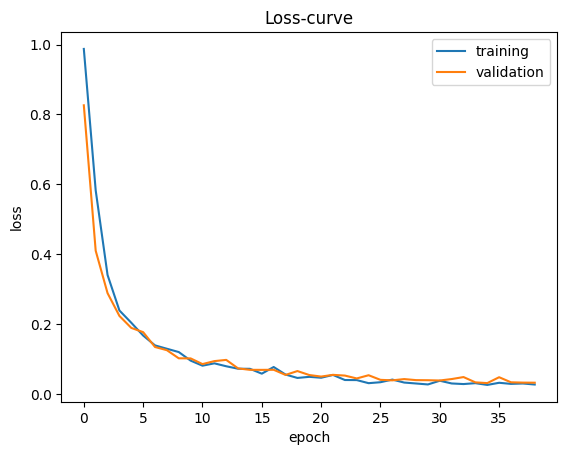

In [103]:
# plot loss-curve_2
pyplot.plot(history.history['loss'], label='training')
pyplot.plot(history.history['val_loss'], label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss-curve')
pyplot.legend()
pyplot.show()

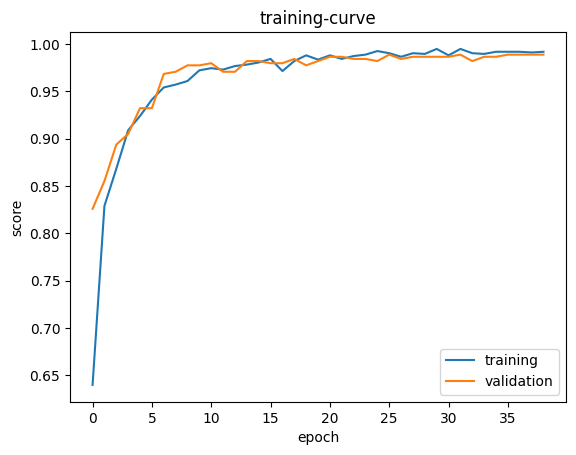

In [104]:
# plot loss-curve_2
pyplot.plot(history.history['accuracy'], label='training')
pyplot.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('epoch')
plt.ylabel('score')
plt.title('training-curve')
pyplot.legend()
pyplot.show()

14/14 [==============================] - 0s 2ms/step
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[1 1 0 1 0 2 0 0 2 1 2 0 0 1 0 2 1 0 0 0 0 1 0 0 1 1 2 1 1 1 0 0 0 1 2 1 2
 2 2 1 0 1 0 1 0 1 0 0 0 0 1 2 2 2 1 1 0 2 1 0 1 1 0 2 0 0 1 0 1 2 0 2 0 0
 0 0 1 0 1 0 1 0 1 1 0 0 2 0 2 0 0 0 0 0 0 1 0 0 0 2 1 1 0 0 0 2 2 0 0 2 1
 1 0 1 0 0 2 0 1 0 1 1 1 1 2 2 0 1 2 1 0 0 0 0 0 1 0 1 1 2 1 1 1 1 0 0 1 2
 0 0 0 0 1 1 0 0 0 2 1 2 1 1 2 0 0 0 2 2 1 0 1 2 0 0 1 1 1 2 2 1 1 0 0 0 1
 0 0 0 2 1 0 1 1 1 0 2 1 0 0 0 0 0 1 1 1 0 1 2 0 0 1 0 1 0 1 2 1 2 0 1 0 2
 0 0 1 0 1 0 2 0 1 1 2 2 1 2 2 0 1 1 0 2 0 0 1 2 2 1 1 0 0 1 1 0 1 2 1 1 0
 0 0 0 0 1 1 1 2 0 0 1 1 0 2 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 2 2 1 0 2 0 0 0
 2 1 2 0 0 1 1 2 2 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 2 0 0 0 0 1 2 0
 1 1 1 1 1 0 0 1 2 0 2 2 0 1 0 0 2 0 2 2 1 0 1 1 2 0 1 2 0 1 1 0 0 0 0 1 1
 0 0 2 0 2 1 1 1 2 2 1 0 1 1 1 2 0 1 2 1 1 0 1 1 0 2 0 0 2 0 1 2 1 1 1 0 1
 2 0 1 0 1 1 2 1 1 0 0 0 0 2 0 0 1 0 0 1 1 1

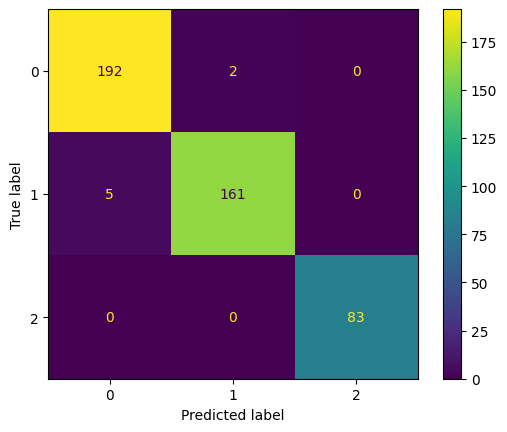

In [105]:
 #confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


predictions=model.predict(X_test_arr)
print(y_test_arr)


for i in range(len(predictions)):
    for j in range(len(predictions[0])):
        if predictions[i][j]==max(predictions[i]):
            predictions[i][j]=1
        else: predictions[i][j]=0

# reverse one-hot encoding for fit into confusion matrix
y_test_cm=y_test_arr.argmax(axis=1)
print(y_test_cm)
predictions_cm=predictions.argmax(axis=1)
print(predictions_cm)

cm = confusion_matrix(y_test_cm, predictions_cm, labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=[0,1,2])
disp.plot()
plt.show()
